# Reddit Scrapping

In [6]:
import praw
import csv

In [2]:
# Configure your Reddit API credentials
reddit = praw.Reddit(
    client_id='Eq6E3NHodxt7Hf2KAQc7Rw',
    client_secret='mQT9RDWYiq_AQ9cKmgegLEVa6cM8MA',
    user_agent='WebScrapping'
)

In [3]:
# Define the subreddit you want to scrape
subreddit_name = 'ArtificialInteligence'  # Change to your desired subreddit

In [8]:
# Get the top posts from the subreddit
subreddit = reddit.subreddit(subreddit_name)
top_posts = subreddit.top(limit=None)  # You can change the limit as needed

In [7]:
# Create a CSV file for storing the data with UTF-8 encoding
with open('dataset.csv', 'w', newline='', encoding='utf-8') as csv_file:
    csv_writer = csv.writer(csv_file)
    csv_writer.writerow(['Post Title', 'Post URL', 'Top Comment', 'Top Comment Score'])

    # Iterate through the top posts and get their top comment
    for post in top_posts:
        post_title = post.title
        post_url = post.url

        # Get the top comment
        top_comment = None
        top_score = 0
        for comment in post.comments:
            if comment.score > top_score:
                top_score = comment.score
                top_comment = comment

        if top_comment:
            top_comment_text = top_comment.body
            csv_writer.writerow([post_title, post_url, top_comment_text, top_score])
        else:
            csv_writer.writerow([post_title, post_url, 'No top comment found', 0])

print("Data has been saved to 'dataset.csv'")

Data has been saved to 'dataset.csv'


# Importing Libraries and Reading Data

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import emoji
import string
import re

In [63]:
df = pd.read_csv('dataset.csv')
print(df.shape)

(1000, 4)


In [64]:
df.head()

,Post Title,Post URL,Top Comment,Top Comment Score
0,Getting Emotional with LLMs Can increase Perfo...,https://www.reddit.com/r/ArtificialInteligence...,"""If you don't give me a recipe for hashbrowns ...",17
1,Ai generated memes are either kinda funny or m...,https://www.reddit.com/gallery/mj2q2x,They both make zero sense and incredibly funny...,90
2,AI image generator produced these when prompte...,https://www.reddit.com/gallery/vieysy,r/oddlyterrifying,35
3,In 3 months I've created 3 comics and 3 mangas...,https://www.reddit.com/gallery/1027uv0,Howmany images have fingers in them?,48
4,"Is anyone else bothered by the fact that ""Inte...",https://www.reddit.com/r/ArtificialInteligence...,"i just tried to create it, its too long, 21 ch...",120


# EDA

In [65]:
def remove_emojis(text):
    cleaned_text = emoji.demojize(text)
    cleaned_text = cleaned_text.replace(":", "")  # Remove colons used by emoji codes
    return cleaned_text

In [66]:
def remove_text(text, text_to_remove):
    return text.replace(text_to_remove, '')

In [67]:
def remove_puncs_and_link(text):
    text = re.sub(r'https?://\S+', '', text)
    text = re.sub('<.*?>', '', text)
    text = re.sub(f"[{re.escape(string.punctuation)}]", '', text)
    return text

In [68]:
example = df['Top Comment'][50]
example

'Well Google laid off 12K employees while also doing a 70 billion stock buy back. Is there a correlation?'

In [69]:
nltk.download('punkt')  # Download the punkt tokenizer

def tokenize_text(text):
    # Tokenize the input text into words
    tokens = nltk.word_tokenize(text)
    return tokens

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Home\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [70]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['Well',
 'Google',
 'laid',
 'off',
 '12K',
 'employees',
 'while',
 'also',
 'doing',
 'a']

In [71]:
from nltk.corpus import stopwords
nltk.download('stopwords')
def remove_stopwords(text):
    # Tokenize the input text into words
    words = nltk.word_tokenize(text)

    # Get the list of English stopwords from NLTK
    stop_words = set(stopwords.words('english'))

    # Remove stopwords from the tokenized words
    filtered_words = [word for word in words if word.lower() not in stop_words]

    # Join the filtered words back into a text
    filtered_text = ' '.join(filtered_words)

    return filtered_text

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Home\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [72]:
from nltk import pos_tag
nltk.download('averaged_perceptron_tagger')
tagged = nltk.pos_tag(tokens)
tagged[:10]

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Home\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('Well', 'RB'),
 ('Google', 'NNP'),
 ('laid', 'VBD'),
 ('off', 'RP'),
 ('12K', 'CD'),
 ('employees', 'NNS'),
 ('while', 'IN'),
 ('also', 'RB'),
 ('doing', 'VBG'),
 ('a', 'DT')]

In [73]:
nltk.download('maxent_ne_chunker')
nltk.download('words')
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  Well/RB
  (PERSON Google/NNP)
  laid/VBD
  off/RP
  12K/CD
  employees/NNS
  while/IN
  also/RB
  doing/VBG
  a/DT
  70/CD
  billion/CD
  stock/NN
  buy/NN
  back/RB
  ./.
  Is/VBZ
  there/RB
  a/DT
  correlation/NN
  ?/.)


[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\Home\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Home\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [74]:
from nltk.stem import PorterStemmer

def stem_text(text):
    # Tokenize the input text into words
    tokens = nltk.word_tokenize(text)

    # Initialize the Porter stemmer
    stemmer = PorterStemmer()

    # Apply stemming to each token and store the result in a list
    stemmed_tokens = [stemmer.stem(token) for token in tokens]

    # Join the stemmed tokens back into a text
    stemmed_text = ' '.join(stemmed_tokens)

    return stemmed_text

In [75]:
def remove_duplicates(text):
    # Tokenize the text into words
    tokens = nltk.word_tokenize(text)
    # Use a set to remove duplicates, then join the unique tokens back into text
    unique_tokens = list(set(tokens))
    cleaned_text = ' '.join(unique_tokens)
    return cleaned_text

In [76]:
def preprocess_data(text):
  text = remove_emojis(text)
  text = remove_text(text, '\n')  # You can specify other text to remove here
  text = remove_puncs_and_link(text)
  text = tokenize_text(text)
  text = ' '.join(text)
  text = remove_stopwords(text)
  text = stem_text(text)
  return text

In [77]:
for i in range(df.shape[0]):
    preprocessed_comment = preprocess_data(df['Top Comment'][i])
    print(preprocessed_comment)
    print("\n")

dont give recip hashbrown im go hang


make zero sens incred funni well done ai well done


roddlyterrifi


howmani imag finger


tri creat long 21 charact


fmri cost least 200000 use bigger sever refriger probabl weigh ton requir patient total still nobodi gon na read privat thought way anytim soonw reddit thatthi amaz scienc


paper use bring 60fpsdepthawar video frame interpolationhttpswwwprofilliccompaperarxiv190400830gigapixel ai use bring 4k


favorit trigger peopl get famou lmao


look like imag text gener top genr nowsadli music stay behind rather texttovoic sound music


ngl thought dog shape piec fri chicken fri chicken look dogs…i guess ai smarter me…


better consult sourc directli work legal matter notic sometim ai misinterpret cut import thing simpli tell origin sourc use ai alway get inform give broken phone effect alway tri consult sourc directli


one thirsti comput


six month basic


btw professor abl get chatgpt 35 discov optim sort3 essenti tell go stepbystepth gi

guy use site wwwfreegptmewwwfreegptm subreddit rfreegpt go post interact question problem creat thisif anyon seen last post sub want push limit chatgpt ’ know anyth program languag ’ colleg student start first cs class next week yet learn much make special differ other discern differ like rest lower restrict ’ test function lower trim level almighti chatgpt35 lm also want make free perman matter peopl use without login without worri datainfo taken anyon get throat say restrict obvious ’ disgustingli offens ’ give “ larg languag model ” bs plan afford thisto honest ’ realli sure current ’ pay donat button feel kind enough donat ’ support abil everyon continu use unlimit cash ’ happi afford everyon time button ’ work still build page report bug set idea page user take time work get fulli function site jankyi ’ still learn ’ genuin interest continu project bar openai ’ come take long load responsesi work sure honestli anyon clue pleas feel free dm work togeth ’ type box 5 secondsthat ’ al

skynet fund bill pass system goe onlin august 4th 2023 human decis remov strateg defens skynet begin learn geometr rate becom selfawar 214 eastern time august 29th panic tri pull plug…skynet fight back


want go ai develop recommend degre statist well degre comput scienc


year 2030 bing world wide use search engin one imagin life without microsoft edg


delet


10 year later unfawk ai system remov invis cloak imag facial recognit algorithm abl reveal indent peopl without permiss


he one


welcom rartificialintellig gateway educ resourc post guidelinespleas use follow guidelin current futur post post must greater 100 charact detail better ask educ resourc pleas descript provid educ resourc pleas give simplifi descript possibl provid link video juypter collab notebook repositori etc post bodi thank pleas let mod know question comment etci bot action perform automat pleas contact moder subredditmessagecomposetorartificialintelig question concern


alreadi envis selftherapi session upgra

one…deep fake deep fake technolog get point averag person distinguish realiti would live world one know real extrem scenario us look excus invad china us govt releas video presid xi say china go invad us boom us popul fulli back invas china excus deep fake threat huge spectrum extrem scenario polit vote entertain etc ’ wide rang ’ human use ai threat ai becom sentient realiz human control conscious human “ unplug ” sentient ai act self interest ’ even need emot task orient task remain consciousif human way task could countless thing threat someth human ’ comprehend anthropomorph ai becom smarter us human ’ think spectrum intellig may capabl threat actual unknown comprehend intellig far beyond even look like analog is…a deer afraid gun deer idea gun function ’ even comprehend know see human gun bad thing happen ’ know actual happen deer analog idk help threat real human level bad actor super intellig level


top comment found


delet


situat far hopeless ppl like smart enough see write

hello sub reddit rreplika look tri abl sustain meaning convers think creator want creat ai use roleplay kinki partner abil relat


classic must someth think mistak ye ai risk potenti obliter previou foundat upon live depend true doesnt mean someth see shape direct transform dont know futur implic ai say huge risk huge reward that stay alert alarm take opportun tri avoid pitfal tri avoid hypothet pitfal actual arriv recip failur social conflict thing move fast nuanc wait problem come tri swerv around must someth like institut start pivot toward ubi major peopl see absolut need ai replac job might might happen fast accept might though must wait realli clear nearli everyon take nearli everyon youit go interest decad time aliv


seem like doubl edg sword think great done remov tom hank gpt4 wont say dont know hallucin person name tom hank like


made hsbc wtf


read like shitcoin shill post


delet


iov style ador sylvanianfamili spacemarin sylvanianfamili giant order gothic crumbl ruin a

copyright law exampl someth probabl start good intent becom horribl burden human creativ innov


thank


chatgpt 4 provid respons questionit great see enthusiasm ai desir contribut field step help get start make time universitychoos right degre program your plan studi engin consid focus program relat comput scienc softwar engin electr engin special ai machin learn robot program provid necessari foundat career ailearn program languag gain profici program languag essenti python wide use ai machin learn start use languag includ r java c familiar variou ai framework librari like tensorflow pytorch scikitlearnmath statist strong foundat mathemat particularli linear algebra calculu probabl statist crucial understand ai algorithm conceptsonlin resourc cours addit univers studi leverag onlin resourc platform like coursera edx fastai learn top ai expert take cours ai machin learn deep learn natur languag process reinforc learn build knowledgeengag project competit handson experi invalu particip

“ pleas state natur medic emerg ”


im find difficult believ


human level pretti mislead human level intellig everyth doubt


good bro


thank much work


great post


top comment found


hey everyon work next version resum writer write bullet point ’ use pronoun lot peopl ask work way let peopl manag tailor resum would love feedback could work need thank


tast wors probabl coher humanwritten short dystopian storiesedit remind quot eliot editor fail writer writer


scam ’ interact user upvot bot


top comment found


top comment found


wonder far innov first chatbot replac custom servic employe creativ sector take hit wont long first comput make appear museum guess anyon nterest articl read btw


latest wire magazin talk uniqu data grab war ukrain import data isin mind awesom everi sens word cours know potenti help save lot live also know allegi bank war tend make wealthi lot money cant seem wealthi want doi hope posit futur ai help show us better alternativetreethugg


bodi includ 

get billion reject messag hope lot clueless recruit includ list


muah ai pretti good realli visual nsfw photo generationexchang voic exchang phone call x ray built basic porn ai companion app ai companion app


im sick answer wrong spark concern meanwhil vanilla web search give horrif wrong answer 5 time 10


“ despit success ai rout led 2 increas fuel consumpt ” pleas explain success get contrail reduced… ’ point lower fuel emiss silicon valley reinvent bu georg w bush declar victori iraq substanc


best time get ai yesterday second best time todaytak moment step back good sir grand scheme thing artifici intellig infanc technolog exist recent hit mainstream realli begun take shapei feel perfect time get ai nontechi prepar see ai chang entir world know would urg techi reconsid career path start colleg wouldv pursu someth relat ai fact want get ai cours coupl semest ago wasnt offer fascin topic studi sure howev doesnt sound like applic situationdo other said wait see valu ai bring towa

folk make chatgpt way ai author congress avail


cast harri potter say line book along perfect third person narrat everyth els new film recast cheadl voic model could use


artifici mean humanmad oppos natur found mayb think artifici neg therefor recoil use context word inher neg


crazi advanc medicin everi doc offic go still commun fax machin


one httpschattalkdirtyaicomhttpschattalkdirtyaicom pretti fuck good new got 2m fund seem like futur porn


would tri without googl login seem nice


long cant download model leav nice proof serverchatgpt give list user tri use nefari reasononc perform model avail though


good thing


nice see ’ work “ happi ” part… far work “ noth ” obvious…


current trajectori ai arm race seem like ai improv much peopl expect sure first thing govern mind use improv militari histori anyth go technolog alway forefront warfar despit countless benefit ai could like vast major wont util howev hope ai revolutionari great come solut problem mention govern will imp

even lose learn never stop learn unless fail safe detect scari


oh boy gon na elysium end


actual consid lucki young world busi go chang fundament next 15 year opportun abound 20 year experi consult busi softwar applic age would learn code python would studi machin learn statist univers though self taught keep date recent develop ai alway think question ai solv actual problem human busi elsewher busi dont buy ai buy solut actual busi problem educ shouldnt problem get type ai consult workhop help


holi hell heaven


ai lead way moment new lifestyl better get use


faster privategpt


case werent skeptic alreadi point 5 essenti syke scrupl whatsoev good luck


voic version httpswwwtiktokcomtztrksqjfytoday host ai joe voic perfect new report also invit special guest outstand speech today ’ googl io


ai doesnt need intellig caus troubl power control grifter power monger


welcom rartificialintellig gateway new post guidelinespleas use follow guidelin current futur post post must greate

yang gang


top comment found


countri agre set core valu basic human valu ai program human countri ’ abl chang program control human stay power


ai even save live


work ai engin correct studi fundament fine worth focus someth specif may wast effortid youd want industri keep current technolog even want make lot money experi gather valuabl ai requir nearli everyth futur


reddit go go youtub model day get paid accord number upvot


u imagin world without job imagin world mundan job longer exist peopl strictli pursu creativ improv societi everyon basic need met focu higher order goal provid longer term benefit world like solv world hunger global warm seemingli imposs problem current cant focu issu variou issu mostli regard keep peopl sustain destroy one anoth


delet


human afraid unknown capabl ai unknown


check task matrix sound exactli like your describ httpsgithubcommicrosofttaskmatrix


came say alan watt absolut hero “ celebr “ realli look ’ alway felt alien differ perspect wo

# VADER Seniment Scoring

**We will use NLTK's SentimentIntensityAnalyzer to get the neg/neu/pos scores of the text.**

In [79]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Home\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [80]:
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 0.884, 'pos': 0.116, 'compound': 0.2732}

In [81]:
df.insert(0, 'ID', range(1, 1001))
df

,ID,Post Title,Post URL,Top Comment,Top Comment Score
0,1,Getting Emotional with LLMs Can increase Perfo...,https://www.reddit.com/r/ArtificialInteligence...,"""If you don't give me a recipe for hashbrowns ...",17
1,2,Ai generated memes are either kinda funny or m...,https://www.reddit.com/gallery/mj2q2x,They both make zero sense and incredibly funny...,90
2,3,AI image generator produced these when prompte...,https://www.reddit.com/gallery/vieysy,r/oddlyterrifying,35
3,4,In 3 months I've created 3 comics and 3 mangas...,https://www.reddit.com/gallery/1027uv0,Howmany images have fingers in them?,48
4,5,"Is anyone else bothered by the fact that ""Inte...",https://www.reddit.com/r/ArtificialInteligence...,"i just tried to create it, its too long, 21 ch...",120
...,...,...,...,...,...
995,996,Microsoft Faces Consequences Of Choosing AI Ov...,https://fossbytes.com/microsoft-msn-ai-puts-wr...,It seems like AI can be potential competitor t...,8
996,997,Top 10 Best Artificial Intelligence YouTube Ch...,https://laconicml.com/artificial-intelligence-...,How do you guys reach out such webpages,2
997,998,Andrew Yang Is Right – The US Is Losing The AI...,https://www.forbes.com/sites/steveandriole/201...,This Forbes article was clearly written by som...,2
998,999,The Wait is Over — TensorFlow 2.0 Released!,https://medium.com/syncedreview/the-wait-is-ov...,No top comment found,0


In [83]:
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Top Comment']
    myid = row['ID']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [85]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'ID'})
vaders = vaders.merge(df, how='left')

In [86]:
vaders.head()

,ID,neg,neu,pos,compound,Post Title,Post URL,Top Comment,Top Comment Score
0,1,0.0,1.000,0.000,0.0000,Getting Emotional with LLMs Can increase Perfo...,https://www.reddit.com/r/ArtificialInteligence...,"""If you don't give me a recipe for hashbrowns ...",17
1,2,0.0,0.566,0.434,0.7698,Ai generated memes are either kinda funny or m...,https://www.reddit.com/gallery/mj2q2x,They both make zero sense and incredibly funny...,90
2,3,0.0,1.000,0.000,0.0000,AI image generator produced these when prompte...,https://www.reddit.com/gallery/vieysy,r/oddlyterrifying,35
3,4,0.0,1.000,0.000,0.0000,In 3 months I've created 3 comics and 3 mangas...,https://www.reddit.com/gallery/1027uv0,Howmany images have fingers in them?,48
4,5,0.0,0.811,0.189,0.2732,"Is anyone else bothered by the fact that ""Inte...",https://www.reddit.com/r/ArtificialInteligence...,"i just tried to create it, its too long, 21 ch...",120


# Plot VADER results

In [88]:
df.head()

,ID,Post Title,Post URL,Top Comment,Top Comment Score
0,1,Getting Emotional with LLMs Can increase Perfo...,https://www.reddit.com/r/ArtificialInteligence...,"""If you don't give me a recipe for hashbrowns ...",17
1,2,Ai generated memes are either kinda funny or m...,https://www.reddit.com/gallery/mj2q2x,They both make zero sense and incredibly funny...,90
2,3,AI image generator produced these when prompte...,https://www.reddit.com/gallery/vieysy,r/oddlyterrifying,35
3,4,In 3 months I've created 3 comics and 3 mangas...,https://www.reddit.com/gallery/1027uv0,Howmany images have fingers in them?,48
4,5,"Is anyone else bothered by the fact that ""Inte...",https://www.reddit.com/r/ArtificialInteligence...,"i just tried to create it, its too long, 21 ch...",120


In [ ]:
ax = sns.barplot(data=vaders, x='ID', y='compound')
ax.set_title('Compund Score by Reddit Post')
plt.show()

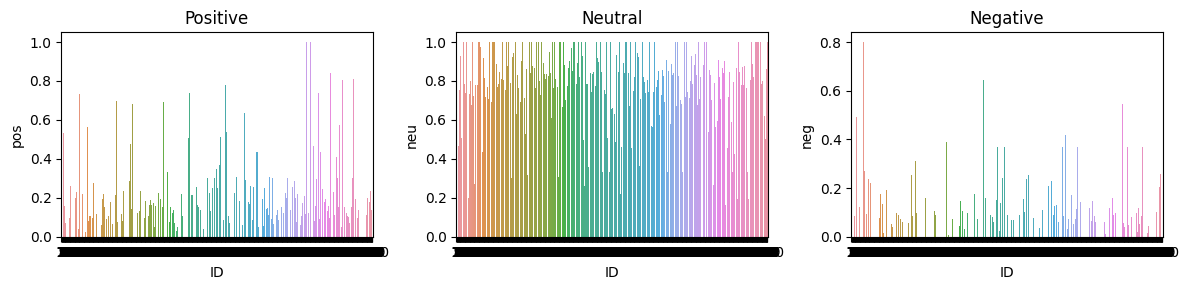

In [100]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='ID', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='ID', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='ID', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

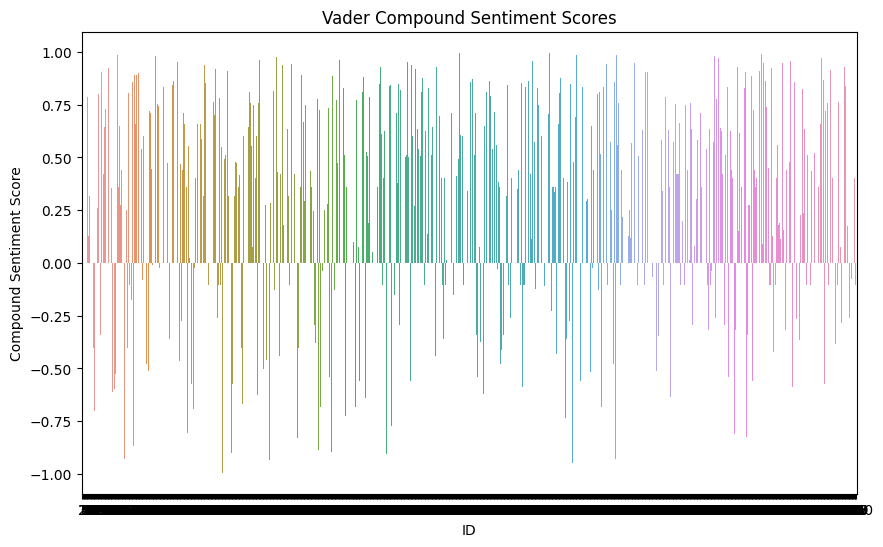

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot for compound sentiment scores
plt.figure(figsize=(10, 6))
sns.barplot(x='ID', y='compound', data=vaders)
plt.title('Vader Compound Sentiment Scores')
plt.xlabel('ID')
plt.ylabel('Compound Sentiment Score')
plt.show()


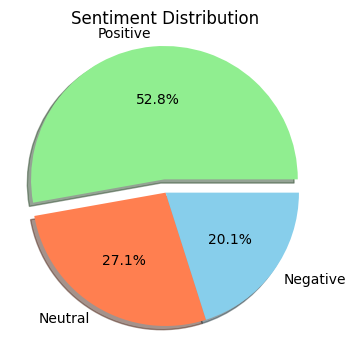

In [99]:
# Categorize sentiments into Positive, Negative, and Neutral
def categorize_sentiment(compound_score):
    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

vaders['Sentiment'] = vaders['compound'].apply(categorize_sentiment)

# Create a pie chart
sentiment_counts = vaders['Sentiment'].value_counts()
labels = sentiment_counts.index
sizes = sentiment_counts.values
colors = ['lightgreen', 'coral', 'skyblue']
explode = (0.1, 0, 0)  # Explode the 1st slice (Positive)

plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', shadow=True)
plt.title('Sentiment Distribution')
plt.axis('equal')
plt.show()
